# Instructions:

1. Data Collection: Data is collected and provided to you.
2. Data Pre-processing: Convert the musical scores into a format suitable for deep learning models. This involves converting the musical scores into MIDI files and applying data augmentation techniques.
3. Feature Extraction: Extract features from the MIDI files, such as notes, chords, and tempo, using music analysis tools.
4. Model Building: Develop a deep learning model using LSTM and CNN architectures to classify the musical scores according to the composer.
5. Model Training: Train the deep learning model using the pre-processed and feature-extracted data.
6. Model Evaluation: Evaluate the performance of the deep learning model using accuracy, precision, and recall metrics.
7. Model Optimization: Optimize the deep learning model by fine-tuning hyperparameters

## Imports

In [1]:
from IPython.display import Image, Audio
import music21
from music21 import *
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
import os
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Convert to midi files



In [108]:
filepath = "/content/drive/MyDrive/AAI511/Composer_Dataset/NN_midi_files_extended/dev/chopin/"
#Getting midi files and converting to midi
all_midis= []
for i in os.listdir(filepath):
    if i.endswith(".mid"):
        tr = filepath+i
        midi = converter.parse(tr)
        all_midis.append(midi)

## Function to get the notes

In [144]:
def extract_features(file_path):
    # Load MIDI file
    midi_data = music21.converter.parse(file_path)

    # Extract notes and chords
    notes = []
    chords = []
    for element in midi_data.flat:
        if isinstance(element, music21.note.Note):
            notes.append(element.pitch.midi)
        elif isinstance(element, music21.chord.Chord):
            chord_pitches = '.'.join(str(n.pitch.midi) for n in element.notes)
            chords.append(chord_pitches)

    # Extract tempo
    tempo = midi_data.flat.getElementsByClass(music21.tempo.TempoIndication)[0].getQuarterBPM()

    data = {'notes': notes, 'tempo': tempo, 'chords': chords}

    return data

## Explore the data

In [145]:
audio_file = '/content/drive/MyDrive/AAI511/Composer_Dataset/NN_midi_files_extended/dev/chopin/chopin061.mid'
notes = extract_features(audio_file)

In [146]:
notes

{'notes': [50,
  59,
  35,
  61,
  62,
  38,
  43,
  46,
  58,
  38,
  43,
  66,
  42,
  61,
  49,
  47,
  62,
  50,
  42,
  66,
  42,
  64,
  40,
  52,
  47,
  56,
  45,
  49,
  64,
  62,
  64,
  38,
  54,
  59,
  43,
  53,
  52,
  46,
  61,
  35,
  52,
  35,
  59,
  50,
  61,
  49,
  42,
  61,
  35,
  52,
  59,
  35,
  50,
  66,
  46,
  61,
  54,
  45,
  60,
  66,
  51,
  65,
  44,
  59,
  49,
  64,
  43,
  59,
  49,
  63,
  42,
  54,
  47,
  62,
  41,
  55,
  47,
  61,
  40,
  55,
  64,
  42,
  52,
  54,
  86,
  86,
  58,
  90,
  90,
  88,
  62,
  78,
  46,
  91,
  86,
  90,
  89,
  74,
  54,
  73,
  66,
  38,
  65,
  49,
  42,
  54,
  47,
  88,
  83,
  54,
  63,
  62,
  51,
  95,
  89,
  83,
  71,
  68,
  51,
  58,
  51,
  51,
  51,
  51,
  46,
  66,
  63,
  51,
  66,
  51,
  95,
  82,
  71,
  68,
  66,
  49,
  49,
  66,
  95,
  78,
  71,
  56,
  72,
  54,
  56,
  72,
  99,
  56,
  95,
  79,
  75,
  59,
  82,
  61,
  75,
  61,
  61,
  60,
  60,
  69,
  59,
  54,
  42,
  60,
  35,
 

## Data Augumentation

In [20]:
import pretty_midi
import numpy as np

def audio_augmentation(file_path, pitch_shift=0, time_stretch=1):
    # Load MIDI file
    midi_data = pretty_midi.PrettyMIDI(file_path)

    # Shift pitch of all notes
    for instrument in midi_data.instruments:
        for note in instrument.notes:
            note.pitch += pitch_shift

    # Stretch time of all notes and adjust time of note ends
    for instrument in midi_data.instruments:
        for note in instrument.notes:
            note.start *= time_stretch
            note.end *= time_stretch

    # Generate audio waveform from MIDI data
    audio_data = midi_data.synthesize()

    # Convert audio data to numpy array
    audio_array = np.array(audio_data)

    return audio_array

In [70]:
audio_file = '/content/drive/MyDrive/AAI511/Composer_Dataset/NN_midi_files_extended/dev/chopin/chopin061.mid'
df = audio_augmentation(audio_file, pitch_shift=0, time_stretch=1)

In [ ]:
df

## Extract features from a MIDI

Feature Extraction: I extracted notes and and tempo, using music analysis tools and incerted it into a pandas dataframe


In [130]:
# Create a Pandas data frame with the extracted features
def extract_features(file_path):
    # Load MIDI file
    midi_data = music21.converter.parse(file_path)

    # Extract notes and chords
    notes = []
    chords = []
    for element in midi_data.flat:
        if isinstance(element, music21.note.Note):
            notes.append(element.pitch.midi)
        elif isinstance(element, music21.chord.Chord):
            chord_pitches = '.'.join(str(n.pitch.midi) for n in element.notes)
            chords.append(chord_pitches)

    # Extract tempo
    tempo = midi_data.flat.getElementsByClass(music21.tempo.TempoIndication)[0].getQuarterBPM()

    data = {'composer': 'Chopen','notes': notes, 'tempo': tempo}
    df = pd.DataFrame(data)

    return df

In [131]:
music = extract_features(audio_file)
music

,composer,notes,tempo
0,Chopen,50,138.0
1,Chopen,59,138.0
2,Chopen,35,138.0
3,Chopen,61,138.0
4,Chopen,62,138.0
...,...,...,...
825,Chopen,61,138.0
826,Chopen,60,138.0
827,Chopen,35,138.0
828,Chopen,59,138.0


<Axes: >

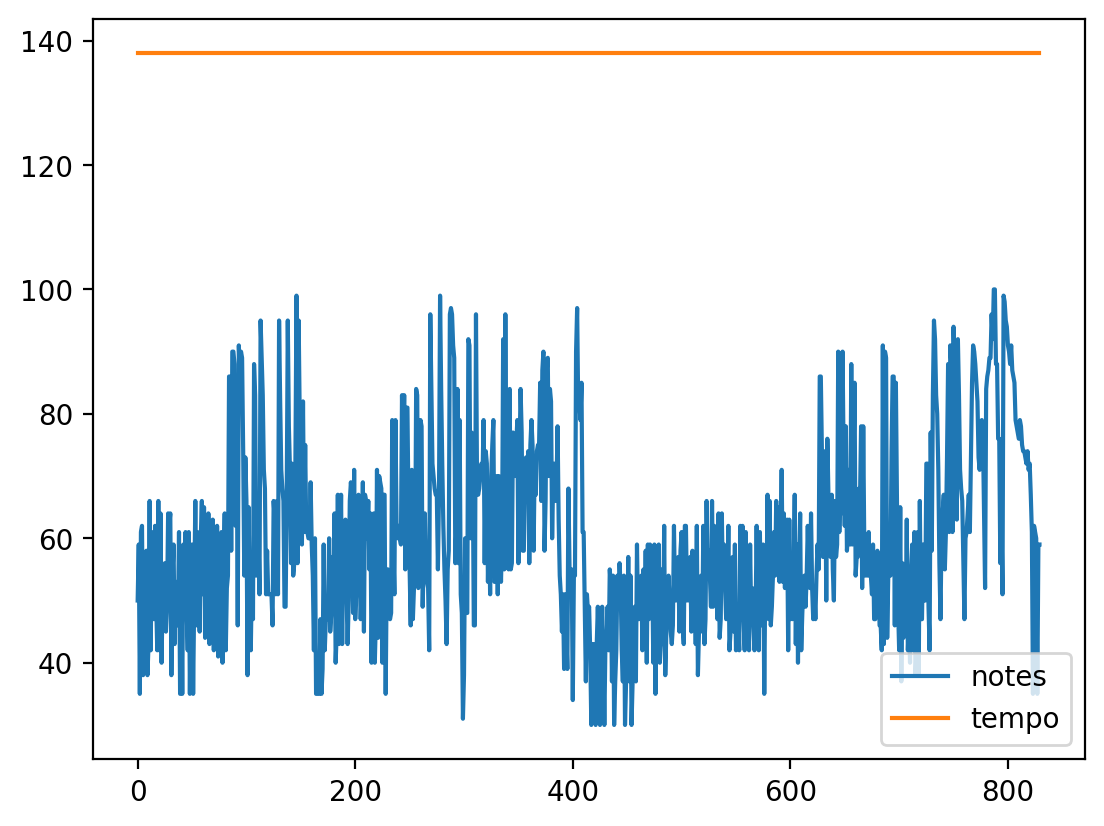

In [132]:
music.plot()

In [ ]:
#@title loop through all train data


## Build LSTM model

## Train LSTM

## Evaluate LSTM

## Build CNN model

## Train CNN

## Evaluate CNN

## Model Optimization